In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sn
import time

1)

Data augmentation in data analysis is a set of techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. It is closely related to oversampling in data analysis. In the real-world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientations, locations, scales, brightness, etc. We account for these situations by training our neural network with additional synthetically modified data.


---


Popular Augmentation Techniques: <br> 1. Flip, 2. Translation, 3. Scale, 4. Rotation, 5. Shearing (Skewing), 6. Contrast/Brightness/illumination/Color/... Change, 7. Random Crop, 8. Random Cutout, 9. Additive/Multiplicative Noise, 10. Deep Generated Data (Modern approach)


---


Data augmentation is done only on the training set as it helps the model become more generalized and robust. So there's no point in augmenting the test set.

2)

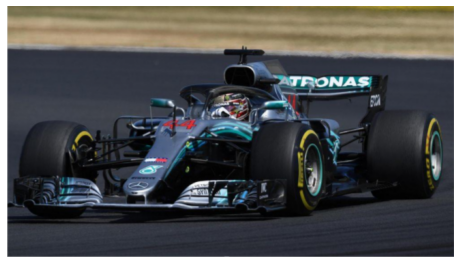

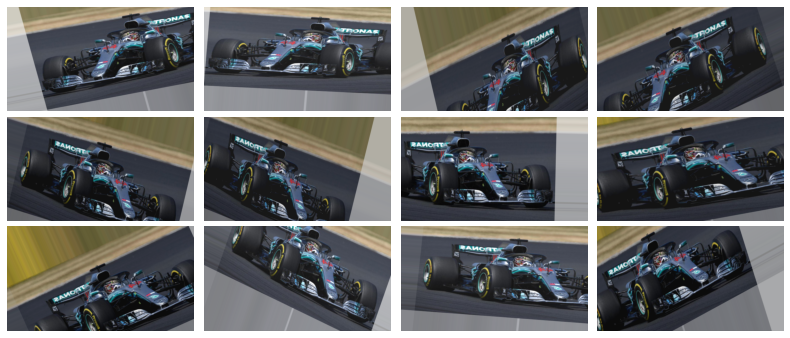

In [ ]:
img = plt.imread('./drive/MyDrive/DL - HW2 Practical/test.png')
fig = plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
img = img[np.newaxis, ...]
datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, channel_shift_range=0.1, horizontal_flip=True)
aug_iter = datagenerator.flow(img, batch_size=1)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 5))
for i in range(12):
  image = next(aug_iter)[0]
  ax[i//4, i%4].imshow(image)
  ax[i//4, i%4].axis('off')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.05)

3)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
number_of_classes = 10;
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
cat_images = train_images[train_labels[:, 0]==3]
reduced_cat_images = cat_images[np.random.choice(range(cat_images.shape[0]), cat_images.shape[0]-4500, False)]
dog_images = train_images[train_labels[:, 0]==5]
reduced_dog_images = dog_images[np.random.choice(range(dog_images.shape[0]), dog_images.shape[0]-4500, False)]
reduced_train_images = np.concatenate((train_images[np.logical_and(train_labels[:, 0]!=3, train_labels[:, 0]!=5)], reduced_cat_images, reduced_dog_images))
reduced_train_labels = np.concatenate((train_labels[np.logical_and(train_labels[:, 0]!=3, train_labels[:, 0]!=5)], 3*np.ones((reduced_cat_images.shape[0], 1)), 5*np.ones((reduced_dog_images.shape[0], 1))))
random_number = np.random.randint(1e9)
np.random.seed(random_number)
permutation = np.random.choice(range(reduced_train_images.shape[0]), reduced_train_images.shape[0], False)
data_X = reduced_train_images[permutation]
data_Y = reduced_train_labels[permutation]

In [ ]:
X_train = data_X[0:32000]
print('X_train =', X_train.shape)
Y_train = data_Y[0:32000]
print('Y_train =', Y_train.shape)
X_validation = data_X[32000:41000]
print('X_validation =', X_validation.shape)
Y_validation = data_Y[32000:41000]
print('Y_validation =', Y_validation.shape)
X_test = test_images
print('X_test =', X_test.shape)
Y_test = test_labels
print('Y_test =', Y_test.shape)

X_train = (32000, 32, 32, 3)
Y_train = (32000, 1)
X_validation = (9000, 32, 32, 3)
Y_validation = (9000, 1)
X_test = (10000, 32, 32, 3)
Y_test = (10000, 1)


In [ ]:
normalized_X_train = (X_train - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_validation = (X_validation- np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_test = (X_test - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
Y_train_one_hot = tf.one_hot(Y_train[:, 0], number_of_classes)
print('Y_train_one_hot.shape: ', Y_train_one_hot.shape)
Y_validation_one_hot = tf.one_hot(Y_validation[:, 0], number_of_classes)
print('Y_validation_one_hot.shape: ', Y_validation_one_hot.shape)
Y_test_one_hot = tf.one_hot(Y_test[:, 0], number_of_classes)
print('Y_test_one_hot.shape: ', Y_test_one_hot.shape)

Y_train_one_hot.shape:  (32000, 10)
Y_validation_one_hot.shape:  (9000, 10)
Y_test_one_hot.shape:  (10000, 10)


In [ ]:
input_shape = (32, 32, 3)
Conv_layer_1_size = 32
Conv_layer_2_size = 32
Conv_layer_3_size = 64
Conv_layer_4_size = 64
Conv_layer_5_size = 128
Conv_layer_6_size = 128
FC_layer_1_size = 512
FC_layer_2_size = 128
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='Imbalanced_dataset_cat_and_dog')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Conv2D(Conv_layer_1_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_1'))
model.add(tf.keras.layers.Conv2D(Conv_layer_2_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_2'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_2'))
model.add(tf.keras.layers.Conv2D(Conv_layer_3_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_3'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_3'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_3'))
model.add(tf.keras.layers.Conv2D(Conv_layer_4_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_4'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_4'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_4'))
model.add(tf.keras.layers.Conv2D(Conv_layer_5_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_5'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_5'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_5'))
model.add(tf.keras.layers.Conv2D(Conv_layer_6_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_6'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_6'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_6'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(FC_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.Dense(FC_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "Imbalanced_dataset"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con_layer_1 (Conv2D)        (None, 32, 32, 32)        2432      
                                                                 
 conv_batch_normalization_1   (None, 32, 32, 32)       128       
 (BatchNormalization)                                            
                                                                 
 conv_dropout_1 (Dropout)    (None, 32, 32, 32)        0         
                                                                 
 con_layer_2 (Conv2D)        (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv_batch_normalization_2   (None, 16, 16, 32)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/Imbalanced_dataset_cat_and_dog')

Epoch 1/100
125/125 [==============================] - 12s 93ms/step - loss: 1.6414 - accuracy: 0.4040 - val_loss: 1.3985 - val_accuracy: 0.4824 - lr: 0.2380
Epoch 2/100
125/125 [==============================] - 11s 90ms/step - loss: 1.3944 - accuracy: 0.4933 - val_loss: 1.3604 - val_accuracy: 0.5128 - lr: 0.2321
Epoch 3/100
125/125 [==============================] - 12s 94ms/step - loss: 1.2689 - accuracy: 0.5403 - val_loss: 1.1903 - val_accuracy: 0.5702 - lr: 0.2265
Epoch 4/100
125/125 [==============================] - 12s 94ms/step - loss: 1.1470 - accuracy: 0.5897 - val_loss: 0.9766 - val_accuracy: 0.6516 - lr: 0.2210
Epoch 5/100
125/125 [==============================] - 11s 90ms/step - loss: 1.0455 - accuracy: 0.6301 - val_loss: 0.9008 - val_accuracy: 0.6867 - lr: 0.2156
Epoch 6/100
125/125 [==============================] - 11s 90ms/step - loss: 0.9660 - accuracy: 0.6616 - val_loss: 0.8528 - val_accuracy: 0.7046 - lr: 0.2103
Epoch 7/100
125/125 [==============================]

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/Imbalanced_dataset_cat_and_dog/history.csv', mode='w') as f:
    hist_df.to_csv(f)

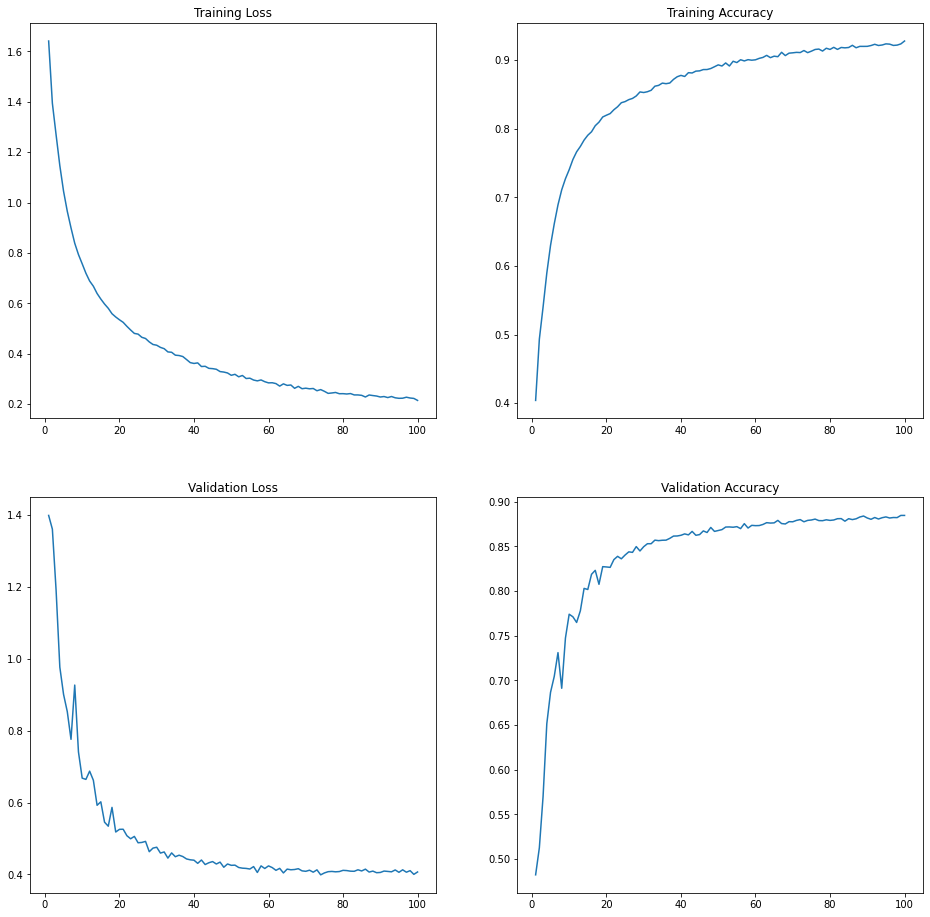

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/Imbalanced_dataset_cat_and_dog/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 4s 11ms/step - loss: 0.8202 - accuracy: 0.7738
Test Loss =  0.8202362060546875
Test Accuracy =  0.7738000154495239


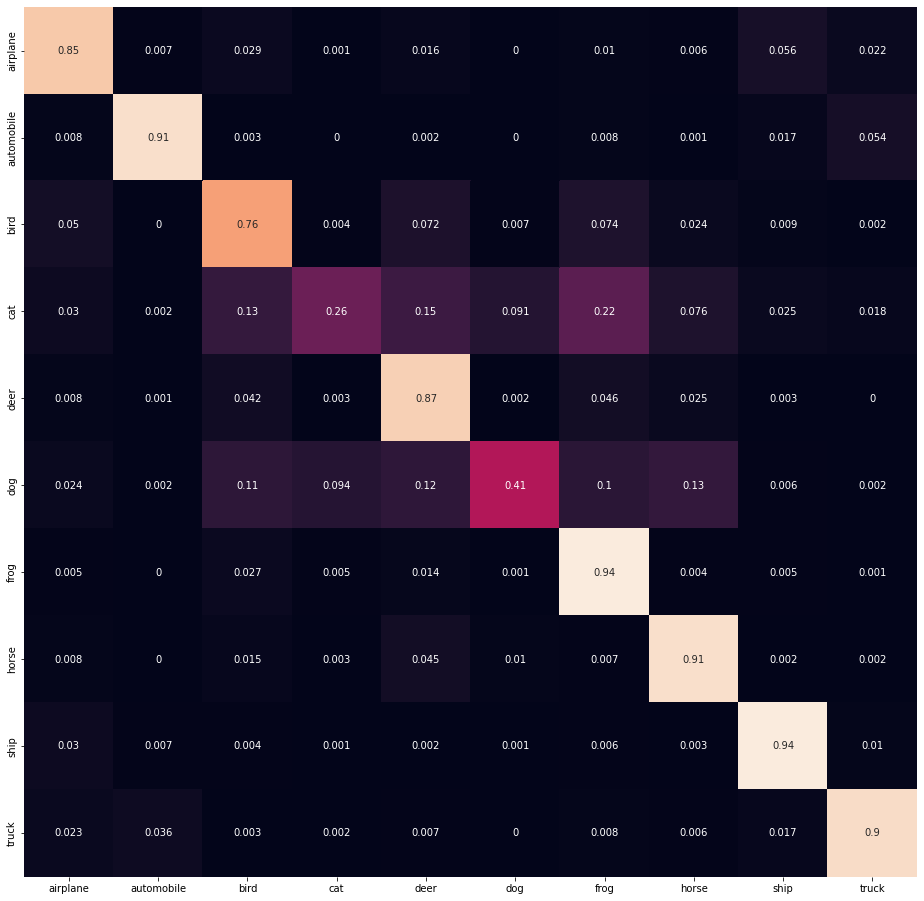

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/Imbalanced_dataset_cat_and_dog')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

The performance of the model significantly weakens on classes 'cat' and 'dog' of the test set.

4)

In [ ]:
augmented_cat_images = reduced_cat_images
aug_iter = datagenerator.flow(reduced_cat_images, batch_size=reduced_cat_images.shape[0])
for i in range((5000-reduced_cat_images.shape[0])//reduced_cat_images.shape[0]):
  augmented_cat_images = np.concatenate((augmented_cat_images, next(aug_iter)))
augmented_dog_images = reduced_dog_images
aug_iter = datagenerator.flow(reduced_dog_images, batch_size=reduced_dog_images.shape[0])
for i in range((5000-reduced_dog_images.shape[0])//reduced_dog_images.shape[0]):
  augmented_dog_images = np.concatenate((augmented_dog_images, next(aug_iter)))
augmented_train_images = np.concatenate((train_images[np.logical_and(train_labels[:, 0]!=3, train_labels[:, 0]!=5)], augmented_cat_images, augmented_dog_images))
augmented_train_labels = np.concatenate((train_labels[np.logical_and(train_labels[:, 0]!=3, train_labels[:, 0]!=5)], 3*np.ones((augmented_cat_images.shape[0], 1)), 5*np.ones((augmented_dog_images.shape[0], 1))))
permutation = np.random.choice(range(augmented_train_images.shape[0]), augmented_train_images.shape[0], False)
data_X = augmented_train_images[permutation]
data_Y = augmented_train_labels[permutation]

In [ ]:
X_train = data_X[0:40960]
print('X_train =', X_train.shape)
Y_train = data_Y[0:40960]
print('Y_train =', Y_train.shape)
X_validation = data_X[40960:50000]
print('X_validation =', X_validation.shape)
Y_validation = data_Y[40960:50000]
print('Y_validation =', Y_validation.shape)
X_test = test_images
print('X_test =', X_test.shape)
Y_test = test_labels
print('Y_test =', Y_test.shape)

X_train = (40960, 32, 32, 3)
Y_train = (40960, 1)
X_validation = (9040, 32, 32, 3)
Y_validation = (9040, 1)
X_test = (10000, 32, 32, 3)
Y_test = (10000, 1)


In [ ]:
normalized_X_train = (X_train - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_validation = (X_validation- np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_test = (X_test - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
Y_train_one_hot = tf.one_hot(Y_train[:, 0], number_of_classes)
print('Y_train_one_hot.shape: ', Y_train_one_hot.shape)
Y_validation_one_hot = tf.one_hot(Y_validation[:, 0], number_of_classes)
print('Y_validation_one_hot.shape: ', Y_validation_one_hot.shape)
Y_test_one_hot = tf.one_hot(Y_test[:, 0], number_of_classes)
print('Y_test_one_hot.shape: ', Y_test_one_hot.shape)

Y_train_one_hot.shape:  (40960, 10)
Y_validation_one_hot.shape:  (9040, 10)
Y_test_one_hot.shape:  (10000, 10)


In [ ]:
input_shape = (32, 32, 3)
Conv_layer_1_size = 32
Conv_layer_2_size = 32
Conv_layer_3_size = 64
Conv_layer_4_size = 64
Conv_layer_5_size = 128
Conv_layer_6_size = 128
FC_layer_1_size = 512
FC_layer_2_size = 128
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='Augmented_dataset_cat_and_dog')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Conv2D(Conv_layer_1_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_1'))
model.add(tf.keras.layers.Conv2D(Conv_layer_2_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_2'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_2'))
model.add(tf.keras.layers.Conv2D(Conv_layer_3_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_3'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_3'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_3'))
model.add(tf.keras.layers.Conv2D(Conv_layer_4_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_4'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_4'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_4'))
model.add(tf.keras.layers.Conv2D(Conv_layer_5_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_5'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_5'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_5'))
model.add(tf.keras.layers.Conv2D(Conv_layer_6_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_6'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_6'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_6'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(FC_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.Dense(FC_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "Augmented_dataset_cat_and_dog"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con_layer_1 (Conv2D)        (None, 32, 32, 32)        2432      
                                                                 
 conv_batch_normalization_1   (None, 32, 32, 32)       128       
 (BatchNormalization)                                            
                                                                 
 conv_dropout_1 (Dropout)    (None, 32, 32, 32)        0         
                                                                 
 con_layer_2 (Conv2D)        (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv_batch_normalization_2   (None, 

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/Augmented_dataset_cat_and_dog')

Epoch 1/100
160/160 [==============================] - 16s 93ms/step - loss: 1.9125 - accuracy: 0.3202 - val_loss: 1.5131 - val_accuracy: 0.4326 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 15s 92ms/step - loss: 1.5284 - accuracy: 0.4330 - val_loss: 1.3458 - val_accuracy: 0.4923 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 15s 93ms/step - loss: 1.3749 - accuracy: 0.4866 - val_loss: 1.2283 - val_accuracy: 0.5371 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 14s 90ms/step - loss: 1.2743 - accuracy: 0.5288 - val_loss: 1.1271 - val_accuracy: 0.5842 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 14s 88ms/step - loss: 1.1672 - accuracy: 0.5706 - val_loss: 0.9911 - val_accuracy: 0.6260 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 15s 92ms/step - loss: 1.0892 - accuracy: 0.5979 - val_loss: 0.9324 - val_accuracy: 0.6508 - lr: 0.2156
Epoch 7/100
160/160 [==============================]

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/Augmented_dataset_cat_and_dog/history.csv', mode='w') as f:
    hist_df.to_csv(f)

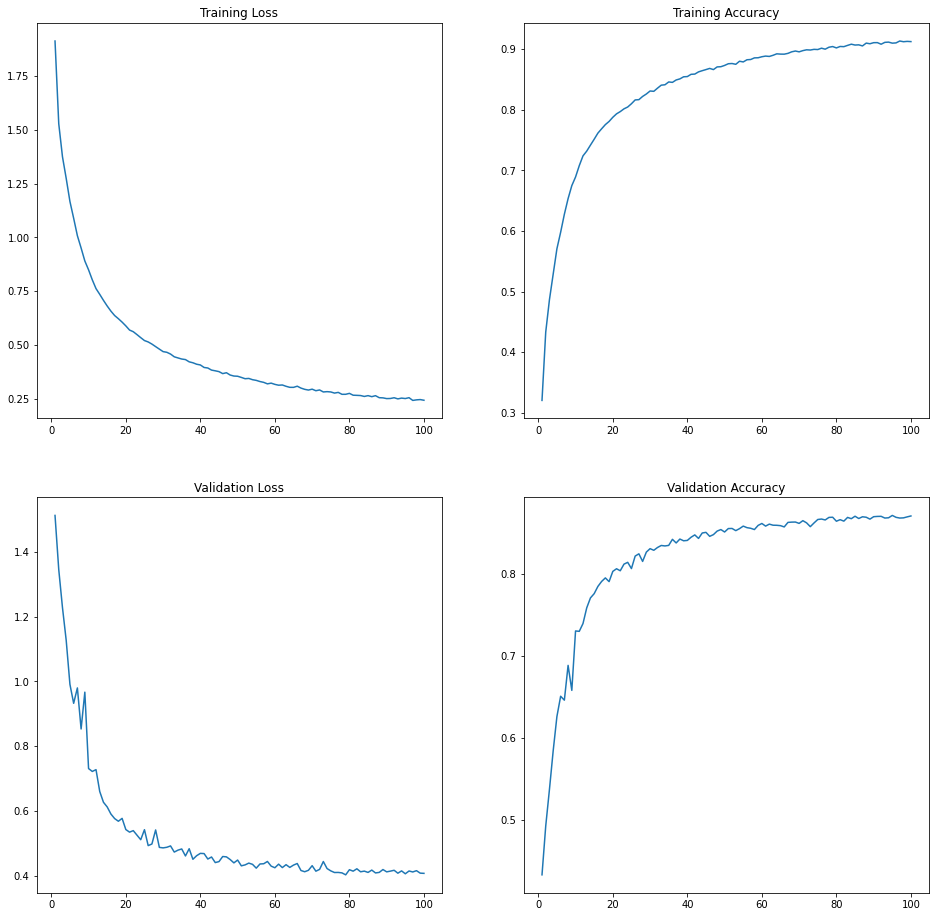

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/Augmented_dataset_cat_and_dog/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 4s 10ms/step - loss: 0.6696 - accuracy: 0.8134
Test Loss =  0.6695989966392517
Test Accuracy =  0.8133999705314636


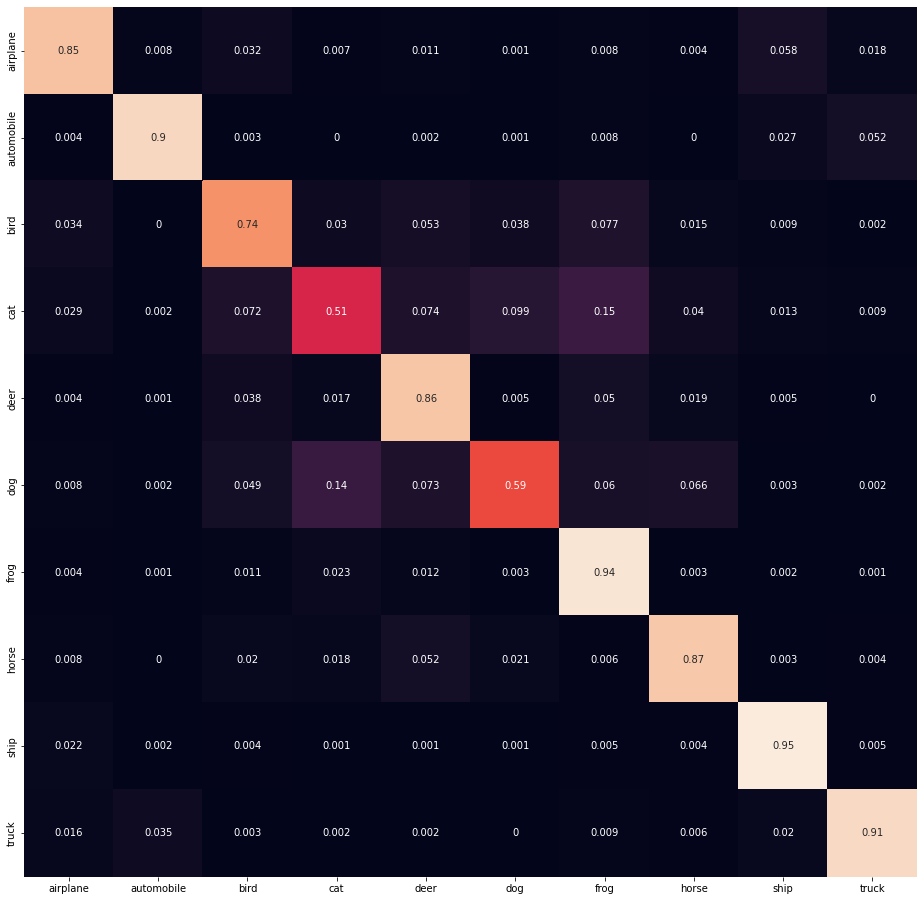

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/Augmented_dataset_cat_and_dog')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

The performance of the model improves on classes 'cat' and 'dog' of the test set in comparison with the previous part.